In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import inset_axes
import pickle
import geopandas as gpd
import seaborn as sns
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error
from scipy import stats

/anaconda3/envs/fiona_problem/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  after removing the cwd from sys.path.


In [2]:
def plot_sec(T1,T2,lai_model,color,ax,linewidth):
    lai_temp=lai_model[(lai_model.DOY>=T1)&(lai_model.DOY<=T2)]
    ax.plot(lai_temp.DOY,lai_temp.LAI,color=color,linewidth=linewidth) 
    
    
def cal_periods(lai_model):
    
    lai_model=lai_model.resample('1D').mean()
    tr=.1
    temp_top=lai_model[lai_model.LAI>=lai_model.LAI.max()*(1-tr)]
    temp_bottom=lai_model[lai_model.LAI<=lai_model.LAI.min()*(1+tr)]

    a=temp_top.DOY.min()-temp_bottom
    a=a[a>0]
    b=temp_top.DOY.min()-a.min()
    t1=int(b.DOY)
    t2=temp_top.DOY.min()
    t3=temp_top.DOY.max()

    lai_temp=lai_model[lai_model.DOY>t3]
    temp_bottom=lai_temp[lai_temp.LAI<=lai_temp.LAI.min()*(1+tr)]
    a=temp_top.DOY.max()-temp_bottom
    a=a[a<0]
    b=temp_top.DOY.max()-a.max()
    t4=int(b.DOY)
    
    return [t1,t2,t3,t4]



def devid_all(lai_model,ax,linewidth):
    
    [t1,t2,t3,t4]=cal_periods(lai_model)


    plot_sec(0,t1,lai_model,'b',ax,linewidth)
    plot_sec(t1,t2,lai_model,'g',ax,linewidth)
    plot_sec(t2,t3,lai_model,'k',ax,linewidth)
    plot_sec(t3,t4,lai_model,'g',ax,linewidth)
    plot_sec(t4,365,lai_model,'b',ax,linewidth)


# LAI

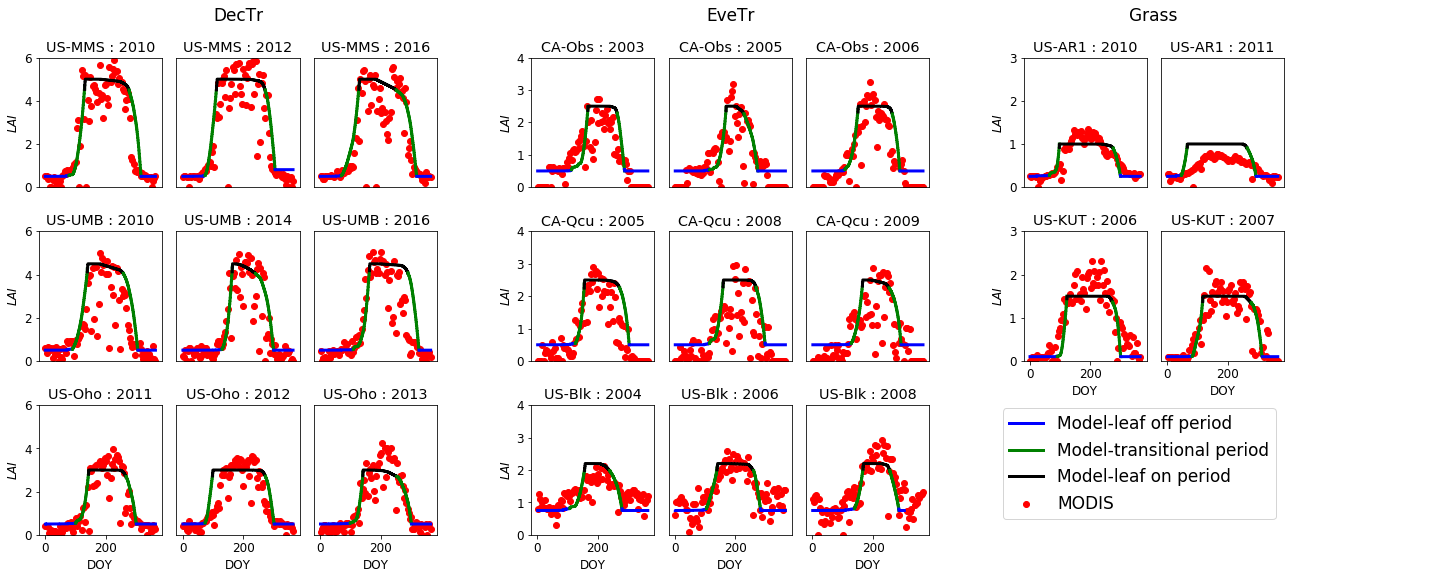

In [3]:
plt.rcParams.update({'font.size': 12})
fig,axs=plt.subplots(1,3,figsize=(25,9))
height=1.8
width="30%"
linewidth=3

ax=axs[0]
names=['US-MMS','US-UMB','US-Oho']
years={'US-MMS':[2010,2012,2016],
       'US-UMB':[2010,2014,2016],
       'US-Oho':[2011,2012,2013]
      }
fig_number={'US-MMS':[2,9,1],
       'US-UMB':[6,10,7],
       'US-Oho':[3,8,4]
      }

for name in names:
    

    for i,year in zip(fig_number[name],years[name]):
        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)
        
        with open('LAI/'+name+'-'+str(year)+'-MODIS','rb') as f:
            df_period=pickle.load(f)
        with open('LAI/'+name+'-'+str(year)+'-Model','rb') as f:
            lai_model=pickle.load(f)
            
        #box_1.plot(lai_model.DOY,lai_model.LAI,color='b',label='Model',linewidth=linewidth)
        
        devid_all(lai_model,box_1,linewidth)
        box_1.scatter(df_period.index,df_period.value_mean,color='r',label='MODIS')
        box_1.set_title(name+' : '+str(year))
        
        box_1.set_ylim([0,6])
        if i not in [3,4,8]:
            box_1.set_xticks([])
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('DOY')
        if i not in [2,3,6]:
            box_1.set_yticks([])
        else:
            box_1.set_ylabel('$LAI$')
        

ax.axis('off')
ax.set_title('DecTr',y=1.05,fontsize=17)






names=['CA-Obs','CA-Qcu','US-Blk']
years={
       names[0]:[2003,2005,2006],
       names[1]:[2005,2008,2009],
       names[2]:[2004,2006,2008]
      }
fig_number={names[0]:[2,9,1],
            names[1]:[6,10,7],
            names[2]:[3,8,4]
      }

ax=axs[1]
for name in names:
    for i,year in zip(fig_number[name],years[name]):
        
        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)
        with open('LAI/'+name+'-'+str(year)+'-MODIS','rb') as f:
            df_period=pickle.load(f)
        with open('LAI/'+name+'-'+str(year)+'-Model','rb') as f:
            lai_model=pickle.load(f)

            #box_1.plot(lai_model.DOY,lai_model.LAI,color='b',label='Model',linewidth=linewidth)
            devid_all(lai_model,box_1,linewidth)
            box_1.scatter(df_period.index,df_period.value_mean,color='r',label='MODIS')
            box_1.set_title(name+' : '+str(year))
            box_1.set_ylim([0,4])

        if i not in [3,4,8]:
            box_1.set_xticks([])
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('DOY')

        if i not in [2,3,6]:
            box_1.set_yticks([])
        else:
            box_1.set_ylabel('$LAI$')
    
ax.axis('off')
ax.set_title('EveTr',y=1.05,fontsize=17)






names=['US-AR1','US-KUT']
years={names[0]:[2010,2011],
       names[1]:[2006,2007]
      }
fig_number={names[0]:[2,9],
            names[1]:[6,10]
      }

ax=axs[2]

for name in names:
    

    for i,year in zip(fig_number[name],years[name]):

        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)
        with open('LAI/'+name+'-'+str(year)+'-MODIS','rb') as f:
            df_period=pickle.load(f)
        with open('LAI/'+name+'-'+str(year)+'-Model','rb') as f:
            lai_model=pickle.load(f)

            #box_1.plot(lai_model.DOY,lai_model.LAI,color='b',label='Model',linewidth=linewidth)
            devid_all(lai_model,box_1,linewidth)
            box_1.scatter(df_period.index,df_period.value_mean,color='r',label='MODIS')
            box_1.set_title(name+' : '+str(year))
            box_1.set_ylim([0,4])
        box_1.set_ylim([0,3])

        if i not in [10,6,7]:
            box_1.set_xticks([]) 
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('DOY')

        if i not in [2,3,6]:
            box_1.set_yticks([])
        else:
            box_1.set_ylabel('$LAI$')
    
    
    
ax.axis('off')
ax.set_title('Grass',x=.33,y=1.05,fontsize=17)



plt.plot([],[],color='b',linewidth=linewidth,label='Model-leaf off period')
plt.plot([],[],color='g',linewidth=linewidth,label='Model-transitional period')
plt.plot([],[],color='k',linewidth=linewidth,label='Model-leaf on period')

plt.legend(bbox_to_anchor=(1, -.3),fontsize=17)

plt.savefig('LAI_all.png',dpi=300,bbox_inches = 'tight',pad_inches = 0.01)

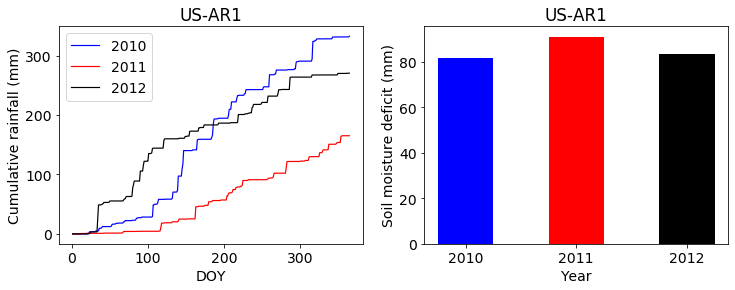

In [76]:
plt.rcParams.update({'font.size': 14})
fig,axs=plt.subplots(1,2,figsize=(12,4))

name='US-AR1'
years=[2010,2011,2012]
colors=['b','r','k']
smds=[]
for year,color in zip(years,colors):
    with open('output/'+name+'-'+str(year),'rb') as f:
        out=pickle.load(f)

    x=out['rain']['x'].iloc[0:-1]
    y=out['rain']['y'].iloc[0:-1]

    ax=axs[0]
    ax.plot(x,y.cumsum(),color=color,label=year,linewidth=1.2)

    y=out['smd']['y'].iloc[0:-1]
    smds.append(np.mean(out['smd']['y'].iloc[0:-1]))
    
    

ax=axs[0]
ax.legend()
ax.set_title('US-AR1')
ax.set_ylabel('Cumulative rainfall (mm)')
ax.set_xlabel('DOY')

ax=axs[1]

x=[0,1,2]

ax.bar(x,smds,color=colors,width=.5)
ax.set_title('US-AR1')
ax.set_ylabel('Soil moisture deficit (mm)')
ax.set_xticks(x)
ax.set_xticklabels([str(x) for x in years])
ax.set_xlabel('Year')

plt.savefig('US-AR1.png',dpi=300,bbox_inches = 'tight',pad_inches = 0.01)

In [54]:
def cal_stat(lai_model,df_period,T1,T2):
    lai_model_temp=lai_model[(lai_model.DOY>=T1)&(lai_model.DOY<=T2)]
    df_period_temp=df_period[(df_period.index>=T1)&(df_period.index<=T2)]

    lai_model_sub=lai_model_temp.resample('1d').mean().set_index('DOY').loc[df_period_temp.index,:]

    MAE=np.mean(abs(df_period_temp.value_mean-lai_model_sub.LAI))
    MBE=np.mean(df_period_temp.value_mean-lai_model_sub.LAI)
    
    return MAE,MBE

def cal_all_stats(lai_model,df_period,t1,t2,t3,t4):
    MAE_all,MBE_all=cal_stat(lai_model,df_period,0,365)
        
    MAE_off_1,MBE_off_1=cal_stat(lai_model,df_period,0,t1)
    MAE_off_2,MBE_off_2=cal_stat(lai_model,df_period,t4,365)
    MAE_off,MBE_off=[(MAE_off_1+MAE_off_2)/2,(MBE_off_1+MBE_off_2)/2]
 
    MAE_tra_1,MBE_tra_1=cal_stat(lai_model,df_period,t1,t2)
    MAE_tra_2,MBE_tra_2=cal_stat(lai_model,df_period,t3,t4)
    MAE_tra,MBE_tra=[(MAE_tra_1+MAE_tra_2)/2,(MBE_tra_1+MBE_tra_2)/2]
        
    MAE_on,MBE_on=cal_stat(lai_model,df_period,t2,t3)
    
    return MAE_all,MBE_all,MAE_off,MBE_off,MAE_on,MBE_on,MAE_tra,MBE_tra

In [55]:
stats_LAI=pd.DataFrame(columns=['site','year','MAE-all','MBE-all',
                                'MAE-off','MBE-off',
                                'MAE-trans','MBE-trans',
                                'MAE-on','MBE-on',])

counter=-1


names=['US-MMS','US-UMB','US-Oho','CA-Obs','CA-Qcu','US-Blk','US-AR1','US-KUT']
years={names[0]:[2010,2012,2016],
       names[1]:[2010,2014,2016],
       names[2]:[2011,2012,2013],
       names[3]:[2003,2005,2006],
       names[4]:[2005,2008,2009],
       names[5]:[2004,2006,2008],
       names[6]:[2010,2011],
       names[7]:[2006,2007],
      }

cal_year={names[0]:[2017],
       names[1]:[2008],
       names[2]:[2010],
       names[3]:[2008],
       names[4]:[2010],
       names[5]:[2005],
       names[6]:[2012],
       names[7]:[2008],
      }

for name in names:
    
        
    for year in years[name]:
        counter=counter+1
        with open('LAI/'+name+'-'+str(year)+'-MODIS','rb') as f:
                df_period=pickle.load(f)
        with open('LAI/'+name+'-'+str(year)+'-Model','rb') as f:
                lai_model=pickle.load(f)

        [t1,t2,t3,t4]=cal_periods(lai_model)
        MAE_all,MBE_all,MAE_off,MBE_off,MAE_on,MBE_on,MAE_tra,MBE_tra=cal_all_stats(lai_model
                                                                                    ,df_period,
                                                                                    t1,t2,t3,t4)
        


        stats_LAI.loc[counter]=([name,year,np.round(MAE_all,2),np.round(MBE_all,2)]+
                                [round(MAE_off,2),round(MBE_off,2)]+
                                [round(MAE_tra,2),round(MBE_tra,2)]+
                                [round(MAE_on,2),round(MBE_on,2)])
        
stats_LAI.to_csv('LAI.csv',index=False)
stats_LAI

/anaconda3/envs/fiona_problem/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike

/anaconda3/envs/fiona_problem/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



,site,year,MAE-all,MBE-all,MAE-off,MBE-off,MAE-trans,MBE-trans,MAE-on,MBE-on
0,US-MMS,2010,0.67,-0.36,0.16,-0.10,1.37,-0.68,0.71,-0.47
1,US-MMS,2012,0.63,-0.41,0.24,-0.19,0.86,-0.80,0.89,-0.46
2,US-MMS,2016,0.68,-0.50,0.08,0.00,0.67,-0.47,1.22,-0.99
3,US-UMB,2010,0.69,-0.58,0.25,-0.08,0.98,-0.95,1.04,-0.95
4,US-UMB,2014,0.54,-0.28,0.23,-0.14,1.02,-0.27,0.74,-0.49
5,US-UMB,2016,0.72,-0.48,0.21,-0.16,1.27,-0.72,1.00,-0.88
6,US-Oho,2011,0.40,-0.21,0.20,-0.16,0.51,-0.44,0.59,-0.12
7,US-Oho,2012,0.48,-0.31,0.14,-0.09,0.76,-0.75,0.66,-0.35
8,US-Oho,2013,0.37,-0.05,0.17,-0.16,0.32,-0.04,0.71,0.09
9,CA-Obs,2003,0.47,-0.26,0.34,-0.23,0.63,-0.16,0.65,-0.62


/anaconda3/envs/fiona_problem/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike

/anaconda3/envs/fiona_problem/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



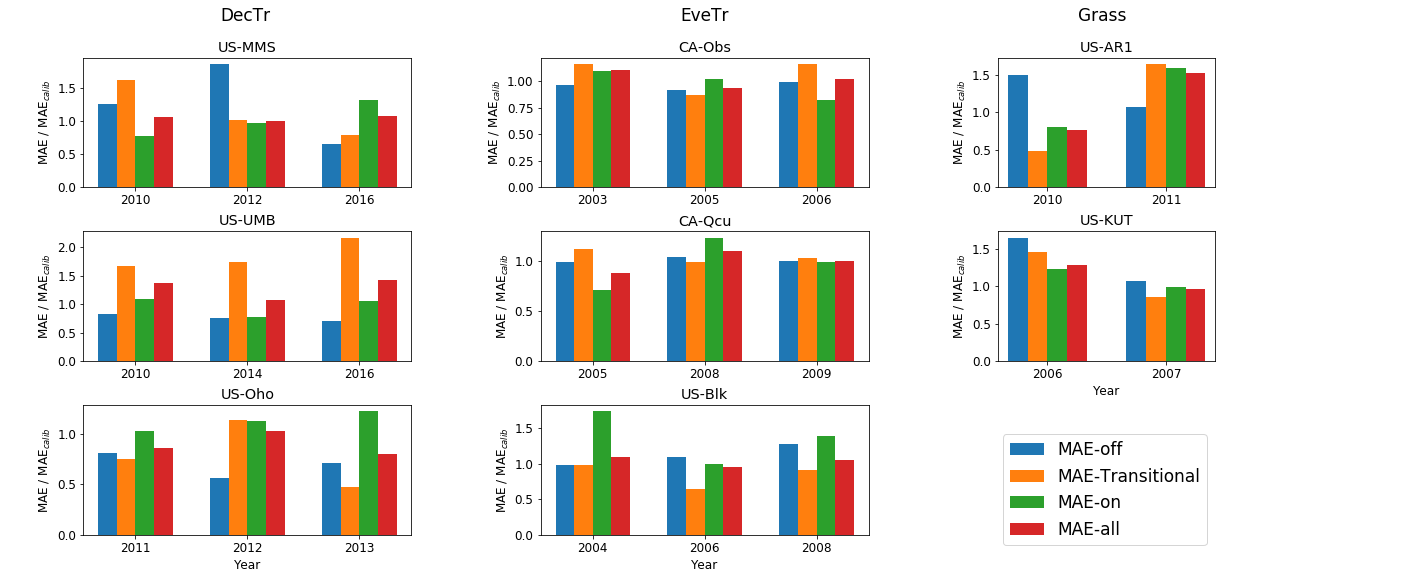

In [56]:
plt.rcParams.update({'font.size': 12})
fig,axs=plt.subplots(1,3,figsize=(25,9))

height=1.8
width="80%"
linewidth=2
w_bar=.1


names=['US-MMS','US-UMB','US-Oho','CA-Obs','CA-Qcu','US-Blk','US-AR1','US-KUT']
years={names[0]:[2010,2012,2016],
       names[1]:[2010,2014,2016],
       names[2]:[2011,2012,2013],
       names[3]:[2003,2005,2006],
       names[4]:[2005,2008,2009],
       names[5]:[2004,2006,2008],
       names[6]:[2010,2011],
       names[7]:[2006,2007],
      }

cal_year={names[0]:[2017],
       names[1]:[2008],
       names[2]:[2010],
       names[3]:[2008],
       names[4]:[2010],
       names[5]:[2005],
       names[6]:[2012],
       names[7]:[2008],
      }


fig_number={names[0]:1,
       names[1]:7,
       names[2]:4,
       names[3]:9,
       names[4]:10,
       names[5]:8,
       names[6]:2,
       names[7]:6,
      }

kinds={names[0]:'DecTr',
       names[3]:'EveTr',
       names[6]:'Grass',

      }

counter=-1
for name in names:
    
    if fig_number[name] in [2,9,1]:
        kind=kinds[name]
        counter=counter+1
        ax=axs[counter]
        ax.axis('off')
        
        if kind == 'Grass':
            ax.set_title(kinds[name],y=1.05,x=.27,fontsize=17)
        elif kind=='DecTr':
            ax.set_title(kinds[name],y=1.05,x=.58,fontsize=17)
        else:
            ax.set_title(kinds[name],y=1.05,fontsize=17)
        
    if kind=='Grass':
        width=str(int(2*80/3))+'%'
    box_1 = inset_axes(ax, 
                       width=width,
                       height=height, 
                       loc=fig_number[name])
    MAE_all_years_frac=[]
    MAE_tra_years_frac=[]
    MAE_on_years_frac=[]
    MAE_off_years_frac=[]
    for year in years[name]:
        

        
        with open('LAI/'+name+'-'+str(year)+'-MODIS','rb') as f:
                df_period=pickle.load(f)
        with open('LAI/'+name+'-'+str(year)+'-Model','rb') as f:
                lai_model=pickle.load(f)
                
        with open('LAI/'+name+'-'+str(cal_year[name][0])+'-MODIS','rb') as f:
                df_period_cal=pickle.load(f)
        with open('LAI/'+name+'-'+str(cal_year[name][0])+'-Model','rb') as f:
                lai_model_cal=pickle.load(f)

        [t1,t2,t3,t4]=cal_periods(lai_model)
        [t1_cal,t2_cal,t3_cal,t4_cal]=cal_periods(lai_model_cal)
        MAE_all,MBE_all,MAE_off,MBE_off,MAE_on,MBE_on,MAE_tra,MBE_tra=cal_all_stats(lai_model
                                                                                    ,df_period,
                                                                                    t1,t2,t3,t4)
        
        MAE_allc,MBE_allc,MAE_offc,MBE_offc,MAE_onc,MBE_onc,MAE_trac,MBE_trac=cal_all_stats(lai_model_cal
                                                                                    ,df_period_cal,
                                                                                    t1_cal,t2_cal
                                                                                    ,t3_cal,t4_cal)
        MAE_all_years_frac.append(MAE_all/MAE_allc)
        MAE_tra_years_frac.append(MAE_tra/MAE_trac)
        MAE_on_years_frac.append(MAE_on/MAE_onc)
        MAE_off_years_frac.append(MAE_off/MAE_offc)
        x=np.arange(len(years[name]))
        
    scale=0.6
    w_bartemp=w_bar
    if kind=='Grass':
        w_bartemp=w_bar
        scale=scale
    x=x*scale
    
    box_1.bar(x-1.5*w_bartemp,MAE_off_years_frac,width=w_bartemp,label='MAE-off')
    box_1.bar(x-w_bartemp/2,MAE_tra_years_frac,width=w_bartemp,label='MAE-Transitional')
    box_1.bar(x+w_bartemp/2,MAE_on_years_frac,width=w_bartemp,label='MAE-on')
    box_1.bar(x+1.5*w_bartemp,MAE_all_years_frac,width=w_bartemp,label='MAE-all')
    
    box_1.set_title(name)
    if fig_number[name] in [4,8,6]:
        box_1.set_xlabel('Year')
    box_1.set_ylabel('MAE / MAE$_{calib}$')
    box_1.set_xticks(x)
    box_1.set_xticklabels([str(x) for x in years[name]])
    
plt.legend(bbox_to_anchor=(1, -.5),fontsize=17)


plt.savefig('MAE_MAEcal_LAI.png',dpi=300,bbox_inches = 'tight',pad_inches = 0.01)

# Alebdo

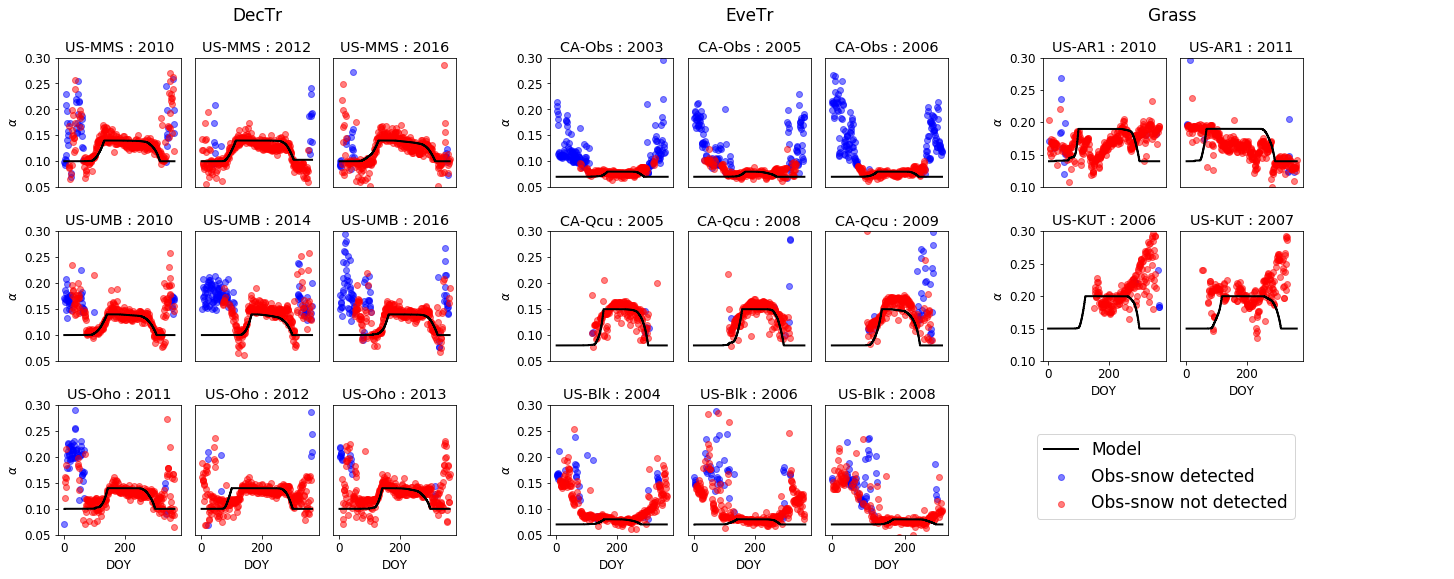

In [6]:
plt.rcParams.update({'font.size': 12})
fig,axs=plt.subplots(1,3,figsize=(25,9))
height=1.8
width="30%"
linewidth=2

ax=axs[0]
names=['US-MMS','US-UMB','US-Oho']
years={'US-MMS':[2010,2012,2016],
       'US-UMB':[2010,2014,2016],
       'US-Oho':[2011,2012,2013]
      }
fig_number={'US-MMS':[2,9,1],
       'US-UMB':[6,10,7],
       'US-Oho':[3,8,4]
      }

for name in names:
    

    for i,year in zip(fig_number[name],years[name]):
        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)
        
        with open('output/'+name+'-'+str(year),'rb') as f:
            out=pickle.load(f)
            
        box_1.plot(out['model']['x'],out['model']['y'],color='k',label='Model',linewidth=linewidth)
        
        ay=out['obs']['y'].resample('1D').mean()
        axx=out['obs']['x'].resample('1D').mean()
        box_1.scatter(axx[out['snow']['y']>0],ay[out['snow']['y']>0],alpha=0.5,color='b',label='Obs')
        box_1.scatter(axx[out['snow']['y']<=0],ay[out['snow']['y']<=0],alpha=0.5,color='r',label='Obs')
        
#         ay=out['Tair']['y']
#         alby=out['obs']['y']
#         albx=out['obs']['x']
#         albx=albx.resample('1D').mean()
#         alby=alby.resample('1D').mean()
#         box_1.scatter(albx[ay<0],alby[ay<0],alpha=0.5,color='b',label='Obs')
#         box_1.scatter(albx[ay>=0],alby[ay>=0],alpha=0.5,color='r',label='Obs')
        
        #box_1.scatter(out['obs']['x'],out['obs']['y'],alpha=0.5,color='r',label='Obs')
        box_1.set_title(name+' : '+str(year))
        box_1.set_ylim([0.05,.3])
        
        if i not in [3,4,8]:
            box_1.set_xticks([])
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('DOY')
        if i not in [2,3,6]:
            box_1.set_yticks([])
        else:
            box_1.set_ylabel(r'$\alpha$')
        

ax.axis('off')
ax.set_title('DecTr',y=1.05,fontsize=17)






names=['CA-Obs','CA-Qcu','US-Blk']
years={
       names[0]:[2003,2005,2006],
       names[1]:[2005,2008,2009],
       names[2]:[2004,2006,2008]
      }
fig_number={names[0]:[2,9,1],
            names[1]:[6,10,7],
            names[2]:[3,8,4]
      }

ax=axs[1]
for name in names:
    for i,year in zip(fig_number[name],years[name]):
        
        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)
        with open('output/'+name+'-'+str(year),'rb') as f:
            out=pickle.load(f)
            
        box_1.plot(out['model']['x'],out['model']['y'],color='k',label='Model',linewidth=linewidth)

        ay=out['obs']['y'].resample('1D').mean()
        axx=out['obs']['x'].resample('1D').mean()
        box_1.scatter(axx[out['snow']['y']>0],ay[out['snow']['y']>0],alpha=0.5,color='b',label='Obs')
        box_1.scatter(axx[out['snow']['y']<=0],ay[out['snow']['y']<=0],alpha=0.5,color='r',label='Obs')
#         ay=out['Tair']['y']
#         alby=out['obs']['y']
#         albx=out['obs']['x']
#         albx=albx.resample('1D').mean()
#         alby=alby.resample('1D').mean()
#         box_1.scatter(albx[ay<0],alby[ay<0],alpha=0.5,color='b',label='Obs')
#         box_1.scatter(albx[ay>=0],alby[ay>=0],alpha=0.5,color='r',label='Obs')
        
        #box_1.scatter(out['obs']['x'],out['obs']['y'],alpha=0.5,color='r',label='Obs')
        box_1.set_title(name+' : '+str(year))
        box_1.set_ylim([0.05,.3])

        if i not in [3,4,8]:
            box_1.set_xticks([])
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('DOY')

        if i not in [2,3,6]:
            box_1.set_yticks([])
        else:
            box_1.set_ylabel(r'$\alpha$')
    
ax.axis('off')
ax.set_title('EveTr',y=1.05,fontsize=17)






names=['US-AR1','US-KUT']
years={names[0]:[2010,2011],
       names[1]:[2006,2007]
      }
fig_number={names[0]:[2,9],
            names[1]:[6,10]
      }

ax=axs[2]

for name in names:
    

    for i,year in zip(fig_number[name],years[name]):

        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)
        with open('output/'+name+'-'+str(year),'rb') as f:
            out=pickle.load(f)
            
        box_1.plot(out['model']['x'],out['model']['y'],color='k',label='Model',linewidth=linewidth)

        ay=out['obs']['y'].resample('1D').mean()
        axx=out['obs']['x'].resample('1D').mean()
        box_1.scatter(axx[out['snow']['y']>0],ay[out['snow']['y']>0],alpha=0.5,color='b',label='Obs-snow detected')
        box_1.scatter(axx[out['snow']['y']<=0],ay[out['snow']['y']<=0],alpha=0.5,color='r',label='Obs-snow not detected')
        
#         ay=out['Tair']['y']
#         alby=out['obs']['y']
#         albx=out['obs']['x']
#         albx=albx.resample('1D').mean()
#         alby=alby.resample('1D').mean()
#         box_1.scatter(albx[ay<0],alby[ay<0],alpha=0.5,color='b',label='Obs-Snow')
#         box_1.scatter(albx[ay>=0],alby[ay>=0],alpha=0.5,color='r',label='Obs-no snow')
        
        #box_1.scatter(out['obs']['x'],out['obs']['y'],alpha=0.5,color='r',label='Obs')
        box_1.set_title(name+' : '+str(year))
        box_1.set_ylim([0.1,.3])

        if i not in [10,6,7]:
            box_1.set_xticks([]) 
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('DOY')

        if i not in [2,3,6]:
            box_1.set_yticks([])
        else:
            box_1.set_ylabel(r'$\alpha$')
    
    
    
ax.axis('off')
ax.set_title('Grass',x=.33,y=1.05,fontsize=17)

plt.legend(bbox_to_anchor=(1, -.5),fontsize=17)

plt.savefig('albedo_all.png',dpi=300,bbox_inches = 'tight',pad_inches = 0.01)

In [3]:
stats_albedo=pd.DataFrame(columns=['site','year','MAE','MBE'])

counter=-1


names=['US-MMS','US-UMB','US-Oho','CA-Obs','CA-Qcu','US-Blk','US-AR1','US-KUT']
years={names[0]:[2010,2012,2016],
       names[1]:[2010,2014,2016],
       names[2]:[2011,2012,2013],
       names[3]:[2003,2005,2006],
       names[4]:[2005,2008,2009],
       names[5]:[2004,2006,2008],
       names[6]:[2010,2011],
       names[7]:[2006,2007],
      }

start='-5-1'
end='-10-30'
for name in names:
    
        
    for year in years[name]:
        counter=counter+1
        

        with open('output/'+name+'-'+str(year),'rb') as f:
            out=pickle.load(f)


        a=out['obs']['y'].resample('1D').mean().loc[str(year)+start:str(year)+end]
        a=a[~np.isnan(a)]
        b=out['model']['y'].resample('1D').mean().loc[a.index]


        MAE=mean_absolute_error(a,b)
        zz=b-a            
        MBE=zz.mean()

        stats_albedo.loc[counter]=([name,year,np.round(MAE,3),np.round(MBE,3)])
        
stats_albedo.to_csv('albedo.csv',index=False)
stats_albedo

,site,year,MAE,MBE
0,US-MMS,2010,0.008,-0.000
1,US-MMS,2012,0.008,0.004
2,US-MMS,2016,0.009,-0.001
3,US-UMB,2010,0.006,-0.001
4,US-UMB,2014,0.014,-0.012
5,US-UMB,2016,0.008,-0.006
6,US-Oho,2011,0.007,0.002
7,US-Oho,2012,0.007,0.001
8,US-Oho,2013,0.010,-0.005
9,CA-Obs,2003,0.007,-0.003


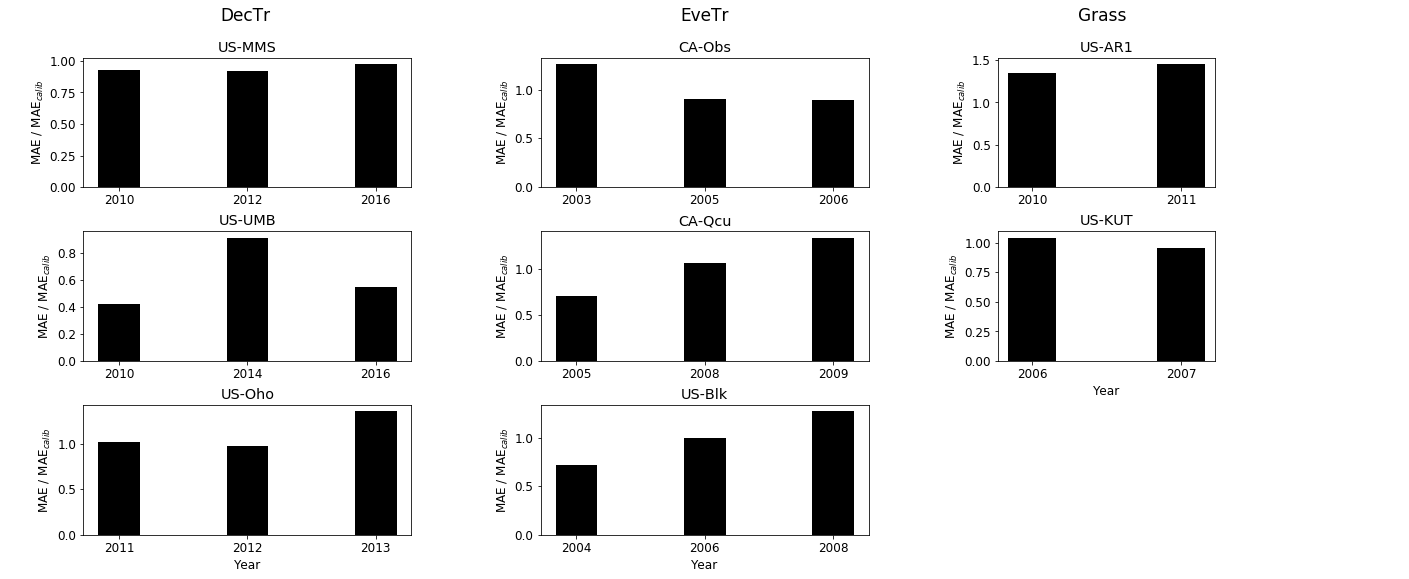

In [60]:
plt.rcParams.update({'font.size': 12})
fig,axs=plt.subplots(1,3,figsize=(25,9))
height=1.8
width="80%"
linewidth=2
w_bar=.1


names=['US-MMS','US-UMB','US-Oho','CA-Obs','CA-Qcu','US-Blk','US-AR1','US-KUT']
years={names[0]:[2010,2012,2016],
       names[1]:[2010,2014,2016],
       names[2]:[2011,2012,2013],
       names[3]:[2003,2005,2006],
       names[4]:[2005,2008,2009],
       names[5]:[2004,2006,2008],
       names[6]:[2010,2011],
       names[7]:[2006,2007],
      }

cal_year={names[0]:[2017],
       names[1]:[2008],
       names[2]:[2010],
       names[3]:[2008],
       names[4]:[2010],
       names[5]:[2005],
       names[6]:[2012],
       names[7]:[2008],
      }


fig_number={names[0]:1,
       names[1]:7,
       names[2]:4,
       names[3]:9,
       names[4]:10,
       names[5]:8,
       names[6]:2,
       names[7]:6,
      }

kinds={names[0]:'DecTr',
       names[3]:'EveTr',
       names[6]:'Grass',

      }

counter=-1
start='-5-1'
end='-10-30'

for name in names:
    
    if fig_number[name] in [2,9,1]:
        kind=kinds[name]
        counter=counter+1
        ax=axs[counter]
        ax.axis('off')
        
        if kind == 'Grass':
            ax.set_title(kinds[name],y=1.05,x=.27,fontsize=17)
        elif kind=='DecTr':
            ax.set_title(kinds[name],y=1.05,x=.58,fontsize=17)
        else:
            ax.set_title(kinds[name],y=1.05,fontsize=17)
        
    if kind=='Grass':
        width=str(int(2*80/3))+'%'
    box_1 = inset_axes(ax, 
                       width=width,
                       height=height, 
                       loc=fig_number[name])
    MAE_all_years_frac=[]
    for year in years[name]:
        

        
        with open('output/'+name+'-'+str(year),'rb') as f:
            out=pickle.load(f)
                
        with open('output/'+name+'-'+str(cal_year[name][0]),'rb') as f:
            out_cal=pickle.load(f)

        a=out['obs']['y'].resample('1D').mean().loc[str(year)+start:str(year)+end]
        a=a[~np.isnan(a)]
        b=out['model']['y'].resample('1D').mean().loc[a.index]

        MAE=mean_absolute_error(a,b)

        
        a=out_cal['obs']['y'].resample('1D').mean().loc[str(cal_year[name][0])+start:str(cal_year[name][0])+end]
        a=a[~np.isnan(a)]
        b=out_cal['model']['y'].resample('1D').mean().loc[a.index]

        MAE_cal=mean_absolute_error(a,b)
                  
                  
        MAE_all_years_frac.append(MAE/MAE_cal)

        x=np.arange(len(years[name]))
        
    scale=0.04
    x=x*scale
    w_bartemp=w_bar*.13
    
    
    box_1.bar(x,MAE_all_years_frac,width=w_bartemp,color='k',label='MAE-all')
    
    box_1.set_title(name)
    if fig_number[name] in [4,8,6]:
        box_1.set_xlabel('Year')
    box_1.set_ylabel('MAE / MAE$_{calib}$')
    box_1.set_xticks(x)
    box_1.set_xticklabels([str(x) for x in years[name]])



plt.savefig('MAE_MAEcal_albedo.png',dpi=300,bbox_inches = 'tight',pad_inches = 0.01)

In [62]:
attrs_all=pd.DataFrame(columns=['site','$LAI_{min}$','$LAI_{max}$',
                                 '$GDD_{Full}$','$SDD_{Full}$',
                                 '$T_{BaseSDD}$','$T_{BaseGDD}$',
                                 r'$\alpha_{min}$',r'$\alpha_{max}$'])

names=['US-MMS','US-UMB','US-Oho','CA-Obs','CA-Qcu','US-Blk','US-AR1','US-KUT']
counter=-1
for name in names:
    counter=counter+1
    with open('LAI/'+name+'-attrs','rb') as f:
        attrs=pickle.load( f)
    with open('albedo/'+name+'-attrs_albedo','rb') as f:
        attrs_alb=pickle.load( f)
        attrs_alb=[attrs_alb[0].loc[98][0],attrs_alb[1].loc[98][0]]
        
        attrs_all.loc[counter]=([name]+attrs+attrs_alb)
        
attrs_all.to_csv('attrs.csv',index=False)        
attrs_all

,site,$LAI_{min}$,$LAI_{max}$,$GDD_{Full}$,$SDD_{Full}$,$T_{BaseSDD}$,$T_{BaseGDD}$,$\alpha_{min}$,$\alpha_{max}$
0,US-MMS,0.50,5.0,450.0,-370.0,21.0,8.0,0.10,0.14
1,US-UMB,0.50,4.5,450.0,-370.0,16.0,5.0,0.10,0.14
2,US-Oho,0.50,3.0,450.0,-370.0,18.0,5.0,0.10,0.14
3,CA-Obs,0.50,2.5,450.0,-370.0,13.0,5.0,0.07,0.08
4,CA-Qcu,0.50,2.5,450.0,-370.0,11.0,2.0,0.08,0.15
5,US-Blk,0.75,2.2,450.0,-370.0,13.0,5.0,0.07,0.08
6,US-AR1,0.25,1.0,450.0,-370.0,20.0,5.0,0.14,0.19
7,US-KUT,0.10,1.5,450.0,-370.0,13.0,5.0,0.15,0.20


# Map and site descriptions

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


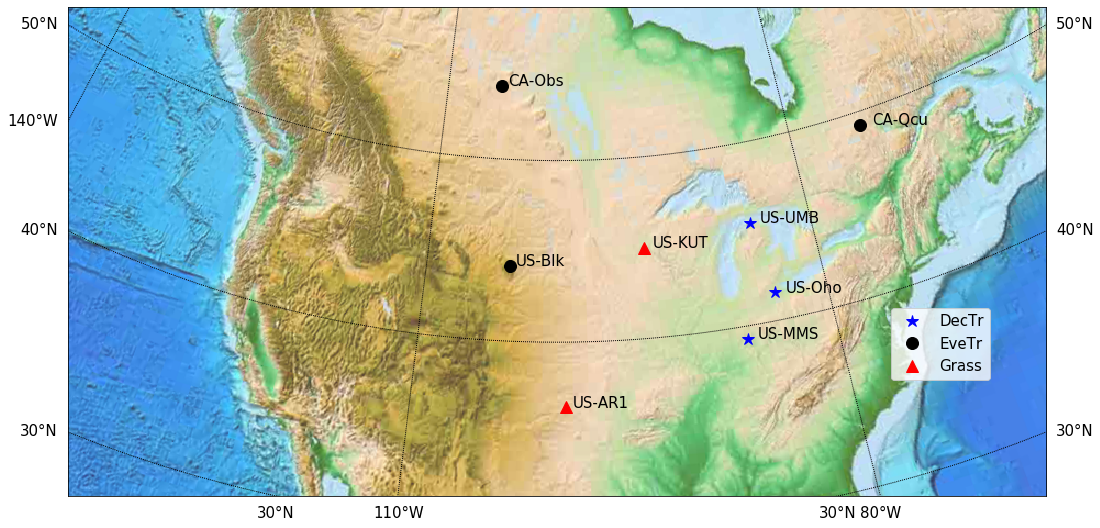

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


fig = plt.figure(figsize=(25, 9))
m = Basemap(projection='lcc', resolution=None,
            width=6E6, height=3E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=1.1, alpha=.8)

all_sites_info =  pd.read_csv('site_info.csv')

dectr=['US-MMS','US-UMB','US-Oho']
evetr=['CA-Obs','CA-Qcu','US-Blk']
grass=['US-AR1','US-KUT']

names=dectr+evetr+grass

for name in names:
    site_info=all_sites_info[all_sites_info['Site Id'] == name]
    df = pd.DataFrame(
            {'Site': [name],
             'Latitude': [site_info['Latitude (degrees)']],
             'Longitude': [site_info['Longitude (degrees)']]})
    x, y = m(df.Longitude.values[0].values[0], df.Latitude.values[0].values[0])
    
   
    if name in dectr:
        marker='*b'
    elif name in evetr:
        marker='ok'
    elif name in grass:
        marker='^r'
    plt.plot(x, y, marker, markersize=12)
    #gdf.plot(ax=ax,color=color,markersize=100)
    plt.annotate(name,(x*1.015,y),color='k')

plt.plot([],[],'*b',label='DecTr',markersize=12)
plt.plot([],[],'ok',label='EveTr',markersize=12)
plt.plot([],[],'^r',label='Grass',markersize=12)
plt.legend(bbox_to_anchor=(.95, .4))

parallels = np.arange(0.,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[True,True,True,True])
meridians = np.arange(10.,351.,30.)
m.drawmeridians(meridians,labels=[True,False,False,True])

plt.savefig('map_of_sites.png',dpi=300,bbox_inches = 'tight',pad_inches = 0.01)

In [3]:
names=['US-MMS','US-UMB','US-Oho','CA-Obs','CA-Qcu','US-Blk','US-AR1','US-KUT']


sources=['@schmid2000measurements',
         '@curtis2002biometric',
         '@noormets2008drought',
         '@bergeron2007comparison',
         '@bergeron2007comparison',
         '@keyser2008changes',
         '-',
         '-'
         ]


DOIs=['10.17190/AMF/1246080',
      '10.17190/AMF/1246107',
      '10.17190/AMF/1246089',
      '10.17190/AMF/1375198',
      '10.17190/AMF/1246828',
      '10.17190/AMF/1246031',
      '10.17190/AMF/1246137',
      '10.17190/AMF/1246145'
      ]


years={names[0]:[2010,2012,2016,2017],
       names[1]:[2008,2010,2014,2016],
       names[2]:[2010,2011,2012,2013],
       names[3]:[2003,2005,2006,2008],
       names[4]:[2005,2008,2009,2010],
       names[5]:[2004,2005,2006,2008],
       names[6]:[2010,2011,2012],
       names[7]:[2006,2007,2008],
      }

temps={}
for name in names:
    all_temp=[]
    for year in years[name]:

        with open('output/'+name+'-'+str(year),'rb') as f:
                    out=pickle.load(f)
        all_temp.append(out['Tair']['y'].mean())
    temps[name]=np.round(np.mean(all_temp),2)




years={names[0]:[2010,2012,2016],
       names[1]:[2010,2014,2016],
       names[2]:[2011,2012,2013],
       names[3]:[2003,2005,2006],
       names[4]:[2005,2008,2009],
       names[5]:[2004,2006,2008],
       names[6]:[2010,2011],
       names[7]:[2006,2007],
      }

cal_year={names[0]:[2017],
       names[1]:[2008],
       names[2]:[2010],
       names[3]:[2008],
       names[4]:[2010],
       names[5]:[2005],
       names[6]:[2012],
       names[7]:[2008],
      }

df=pd.DataFrame()
ct=-1

heights =  pd.read_csv('heights.csv')

for name,source,DOI in zip(names,sources,DOIs):
    ct=ct+1
    txt=''
    counter=0
    try:
        h=str(heights[heights.site==name].height.values[0])
    except:
        h=''
    for year in years[name]:
        txt=txt+str(year)
        if counter!=len(years[name])-1:
            txt=txt+','
        counter=counter+1
    
    all_sites_info =  pd.read_csv('site_info.csv')
    site_info=all_sites_info[all_sites_info['Site Id'] == name]
    a=pd.DataFrame(
                {'Site': [name],
                 'Name': [site_info['Name'].values[0]],
                 'Type':[site_info['Vegetation Description (IGBP)'].values[0]],
                 'Mean Temperature ($^{\circ}$C)':temps[name],
                 'Elevation (m)':[site_info['Elevation (m)'].values[0]],
                 'Tree height (m)':h,
                 'Latitude (degrees)': [site_info['Latitude (degrees)'].values[0]],
                 'Longitude (degrees)': [site_info['Longitude (degrees)'].values[0]],
                 'Calibration year':cal_year[name][0],
                 'Test years':txt,
                 'DOI':DOI,
                 'other sources': source
                 
                })
    df=df.append(a)
df.to_csv('sites.csv',index=False)
df

,Site,Name,Type,Mean Temperature ($^{\circ}$C),Elevation (m),Tree height (m),Latitude (degrees),Longitude (degrees),Calibration year,Test years,DOI,other sources
0,US-MMS,Morgan Monroe State Forest,Deciduous Broadleaf Forests,13.24,275.00,25.0,39.32,-86.41,2017,"2010,2012,2016",10.17190/AMF/1246080,@schmid2000measurements
0,US-UMB,Univ. of Mich. Biological Station,Deciduous Broadleaf Forests,7.07,234.00,20.0,45.56,-84.71,2008,"2010,2014,2016",10.17190/AMF/1246107,@curtis2002biometric
0,US-Oho,Oak Openings,Deciduous Broadleaf Forests,11.01,230.00,24.0,41.55,-83.84,2010,"2011,2012,2013",10.17190/AMF/1246089,@noormets2008drought
0,CA-Obs,"Saskatchewan - Western Boreal, Mature Black Sp...",Evergreen Needleleaf Forests,1.30,628.94,7.2,53.99,-105.12,2008,"2003,2005,2006",10.17190/AMF/1375198,@bergeron2007comparison
0,CA-Qcu,"Quebec - Eastern Boreal, Black Spruce/Jack Pin...",Evergreen Needleleaf Forests,1.59,392.30,13.8,49.27,-74.04,2010,"2005,2008,2009",10.17190/AMF/1246828,@bergeron2007comparison
0,US-Blk,Black Hills,Evergreen Needleleaf Forests,6.61,1718.00,13.0,44.16,-103.65,2005,"2004,2006,2008",10.17190/AMF/1246031,@keyser2008changes
0,US-AR1,ARM USDA UNL OSU Woodward Switchgrass 1,Grasslands,15.58,611.00,,36.43,-99.42,2012,"2010,2011",10.17190/AMF/1246137,-
0,US-KUT,KUOM Turfgrass Field,Grasslands,8.03,301.00,,44.99,-93.19,2008,"2006,2007",10.17190/AMF/1246145,-


# Surface Conductance

In [63]:
def IQR_compare(ob_name,sim_name,df_obs,df_sel_pos,ax):
    y=df_obs[ob_name].groupby(
            [df_obs.index.hour.rename('hr'),
            df_obs.index.minute.rename('min')])
    idx = [pd.datetime(2014, 1, 1, h, m) for h, m in sorted(y.groups.keys())]
    idx = pd.date_range(idx[0], idx[-1], freq='1h')
    
    df_var=df_sel_pos[[sim_name]]
    grp_sdf_var = df_var.groupby(
        [df_var.index.hour.rename('hr'),
        df_var.index.minute.rename('min')])

    idx = [pd.datetime(2014, 1, 1, h, m)
        for h, m in sorted(grp_sdf_var.groups.keys())]
    idx = pd.date_range(idx[0], idx[-1], freq='1h')
    # calculate quartiles
    quar_sel_pos_clm = grp_sdf_var.quantile(
        [.75, .5, .25]).unstack().set_index(idx)
    x_data=[i for i in range(0,24)]
    for var in quar_sel_pos_clm.columns.levels[0]:
        df_x = quar_sel_pos_clm.loc[:, var]
        y0 = df_x[0.5]
        y1, y2 = df_x[0.75], df_x[0.25]
        ax.plot(x_data,y0, label='Model',color='b', linewidth=4)
        ax.fill_between(x_data, y1, y2, alpha=0.3)
        
        
    
    line = ax.lines[0]
    y25=y.quantile([.25])
    y5=y.quantile([.5])
    y75=y.quantile([.75])
    ax.plot(x_data,y5,color='r', linewidth=4,label='Data')
    ax.fill_between(x_data, y25, y75, alpha=0.3)

    ax.set_xlim(0,23)
    
def season_cal(first,end,df_obs,df_sel_pos):

        df_obs_temp=df_obs.loc[str(year)+first:str(year)+end]
        df_sel_pos_temp=df_sel_pos.loc[str(year)+first:str(year)+end]
        
        return df_obs_temp,df_sel_pos_temp

def cal_stats(df_obs,df_sel_pos):
    df_all_obs=df_obs
    df_all_model=df_sel_pos
    obs_var='qe'
    model_var='QE'
    a=df_all_obs[~np.isnan(df_all_obs[obs_var])].index
    x=df_all_obs.loc[a,obs_var]
    y=df_all_model.loc[a,model_var]

    MAE=mean_absolute_error(x,y)
    zz=y-x            
    MBE=zz.mean()
    return MAE,MBE
    
def write_MAE_line(df_obs,df_sel_pos,ax):
    df_all_obs=df_obs
    df_all_model=df_sel_pos
    obs_var='qe'
    model_var='QE'
    ax1=ax
    a=df_all_obs[~np.isnan(df_all_obs[obs_var])].index
    x=df_all_obs.loc[a,obs_var]
    y=df_all_model.loc[a,model_var]
    gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    ax1.plot(x,gradient*x+intercept,color='k')
    MAE_all=mean_absolute_error(x,y)
    zz=y-x            
    MBE_all=zz.mean()
    text1='y = {}x + {} \n MAE = {} \n MBE = {}'.format(round(gradient,2),
                                                        round(intercept,2),
                                                        round(MAE_all,2),
                                                        round(MBE_all,2))
    ax1.text(0.35, 0.82,text1, ha='center', va='center', transform=ax1.transAxes,
    bbox=dict(facecolor='none', edgecolor='none'))


def obs_sim(ob_name,sim_name,df_obs,df_sel_pos,ax,year):
        
        firsts=['-3-1','-6-1','-9-1','-12-1','-1-1']
        ends=['-5-31','-8-31','-11-30','-12-31','-2-28']
        colors=['g','r','y','b','b']
        alphas=[1,.3,.2,.2,.2]
        
        for first,end,color,alpha in zip(firsts,ends,colors,alphas):
            
            df_obs_temp,df_sel_pos_temp=season_cal(first,end,df_obs,df_sel_pos)

            df_QE_comp = pd.concat([df_obs_temp, df_sel_pos_temp], axis=1,
                                    join='inner').loc[:, [sim_name, ob_name]]

            fig_comp_QE = sns.regplot(x='Obs', y='Sim',
                                data=df_QE_comp.rename(
                                    columns={ob_name: 'Obs', sim_name: 'Sim'}),
                                fit_reg=False,ax=ax,color=color,scatter_kws={"alpha": alpha}).figure



        df_QE_comp = pd.concat([df_obs, df_sel_pos], axis=1,
                                join='inner').loc[:, [sim_name, ob_name]]

        fig_comp_QE = sns.regplot(x='Obs', y='Sim',
                            data=df_QE_comp.rename(
                                columns={ob_name: 'Obs', sim_name: 'Sim'}),
                                fit_reg=True,ax=ax,color=color,scatter_kws={"alpha": 0}).figure
        ax.set_ylabel('')    
        ax.set_xlabel('')
        ax.set_title('')

        x0, x1 = ax.get_xlim()
        y0, y1 = ax.get_ylim()
        #ax.set_aspect(abs(x1 - x0) / abs(y1 - y0))
        sns.lineplot(x=[x0,x1],y=[x0,x1],ax=ax,color='k',linewidth=2)
        ax.lines[0].set_color("k")
        ax.lines[1].set_linestyle("--")
        write_MAE_line(df_obs,df_sel_pos,ax)
  

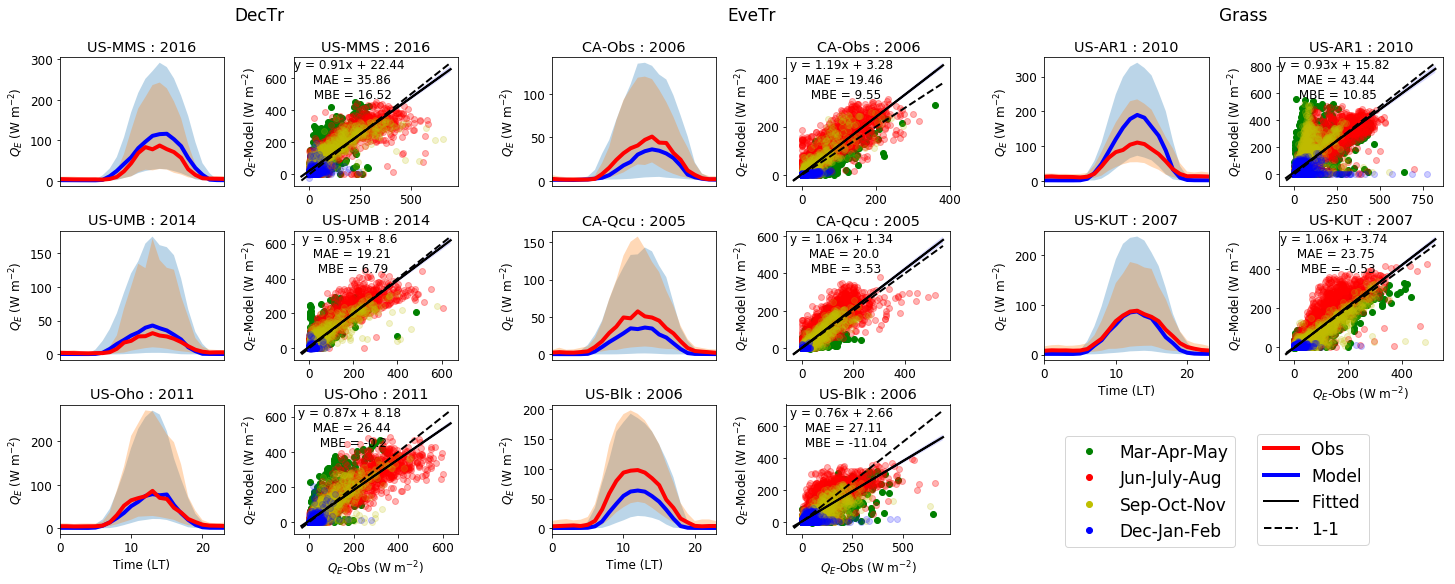

In [64]:
plt.rcParams.update({'font.size': 12})
fig,axs=plt.subplots(1,3,figsize=(25,9))
height=1.8
width="40%"
linewidth=2

ax=axs[0]
names=['US-MMS','US-UMB','US-Oho']
years={'US-MMS':[2016],
       'US-UMB':[2014],
       'US-Oho':[2011]
      }
fig_number={'US-MMS':[2,1],
       'US-UMB':[6,7],
       'US-Oho':[3,4]
      }

for name in names:
    

    for year in years[name]:
        i=fig_number[name][0]
        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)
        
        with open('surface_conductance/'+name+'-'+str(year),'rb') as f:
            out=pickle.load(f)
            
 
        IQR_compare('qe','QE',out['IQR']['obs'],out['IQR']['model'],box_1)
        box_1.set_title(name+' : '+str(year))
        

        if i not in [3]:
            box_1.set_xticks([])
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('Time (LT)')
            
        box_1.set_ylabel('$Q_E $ (W m$^{-2}$)')
            
        i=fig_number[name][1]        
        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)    
            
        obs_sim('qe','QE',out['obs_sim']['obs'],out['obs_sim']['model'],box_1,year)
        box_1.set_title(name+' : '+str(year))
        
        if i not in [4]:
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('$Q_E$-Obs (W m$^{-2}$)')

 

        box_1.set_ylabel('$Q_E$-Model (W m$^{-2}$)')
        
        

ax.axis('off')
ax.set_title('DecTr',y=1.05,fontsize=17)






names=['CA-Obs','CA-Qcu','US-Blk']
years={
       names[0]:[2006],
       names[1]:[2005],
       names[2]:[2006]
      }
fig_number={names[0]:[2,1],
            names[1]:[6,7],
            names[2]:[3,4]
      }

ax=axs[1]
for name in names:
    

    for year in years[name]:
        i=fig_number[name][0]
        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)
        
        with open('surface_conductance/'+name+'-'+str(year),'rb') as f:
            out=pickle.load(f)
            
 
        IQR_compare('qe','QE',out['IQR']['obs'],out['IQR']['model'],box_1)
        box_1.set_title(name+' : '+str(year))
        

        if i not in [3]:
            box_1.set_xticks([])
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('Time (LT)')
            
        box_1.set_ylabel('$Q_E $ (W m$^{-2}$)')
            
        i=fig_number[name][1]        
        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)    
            
        obs_sim('qe','QE',out['obs_sim']['obs'],out['obs_sim']['model'],box_1,year)
        box_1.set_title(name+' : '+str(year))
        
        if i not in [4]:
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('$Q_E$-Obs (W m$^{-2}$)')

 

        box_1.set_ylabel('$Q_E$-Model (W m$^{-2}$)')
        
        

ax.axis('off')
ax.set_title('EveTr',y=1.05,fontsize=17)






names=['US-AR1','US-KUT']
years={names[0]:[2010],
       names[1]:[2007]
      }
fig_number={names[0]:[2,1],
            names[1]:[6,7]
      }

ax=axs[2]

for name in names:
    

    for year in years[name]:
        i=fig_number[name][0]
        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)
        
        with open('surface_conductance/'+name+'-'+str(year),'rb') as f:
            out=pickle.load(f)
            
 
        IQR_compare('qe','QE',out['IQR']['obs'],out['IQR']['model'],box_1)
        box_1.set_title(name+' : '+str(year))
        

        if i not in [6]:
            box_1.set_xticks([])
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('Time (LT)')
            
        box_1.set_ylabel('$Q_E $ (W m$^{-2}$)')
            
        i=fig_number[name][1]        
        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)    
            
        obs_sim('qe','QE',out['obs_sim']['obs'],out['obs_sim']['model'],box_1,year)
        box_1.set_title(name+' : '+str(year))
        
        if i not in [7]:
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('$Q_E$-Obs (W m$^{-2}$)')

 

        box_1.set_ylabel('$Q_E$-Model (W m$^{-2}$)')
        
        
ax.axis('off')
ax.set_title('Grass',x=.5,y=1.05,fontsize=17)


plt.plot([],[],color='r',label='Obs',linewidth=4)
plt.plot([],[],color='b',label='Model',linewidth=4)
plt.plot([],[],'k',label='Fitted',linewidth=2)
plt.plot([],[],'k--',label='1-1',linewidth=2)
plt.legend(bbox_to_anchor=(.6, -.5),fontsize=17)


axs[2].plot([],[],'go',label='Mar-Apr-May')
axs[2].plot([],[],'ro',label='Jun-July-Aug')
axs[2].plot([],[],'yo',label='Sep-Oct-Nov')
axs[2].plot([],[],'bo',label='Dec-Jan-Feb')

axs[2].legend(bbox_to_anchor=(.5, .23),fontsize=17)


plt.savefig('gs_all.png',dpi=300,bbox_inches = 'tight',pad_inches = 0.01)

In [4]:
sites=['US-MMS','CA-Obs','US-KUT']
vegs=['DecTr','EveTr','Grass']
gmaxs=[56.07,27.50,52.72]
g1_g6_all=pd.DataFrame(columns=['$g_{max}$ (m s$^{-1}$)','$G_2$','$G_3$','$G_4$','$G_5$','$G_6$'])

for s,veg,gmax in zip(sites,vegs,gmaxs):
    with open('../gs-calibration/g1-g6/'+s+'-g1-g6','rb') as f:
        a=pickle.load(f)
        g1_g6_all.loc[veg,:]=[gmax]+[np.round(x,3) for x in a[1:]]
g1_g6_all.to_csv('g2-g6.csv',index=True) 
g1_g6_all  

,$g_{max}$ (m s$^{-1}$),$G_2$,$G_3$,$G_4$,$G_5$,$G_6$
DecTr,56.07,105.473,0.272,0.888,45.545,0.026
EveTr,27.5,104.424,0.191,0.892,38.727,0.025
Grass,52.72,104.997,0.616,0.543,36.452,0.029


In [66]:
firsts=['-3-1','-6-1','-9-1','-12-1','-1-1']
ends=['-5-31','-8-31','-11-30','-12-31','-2-28']
stats_gs=pd.DataFrame(columns=['site','year',
                               'MAE(MAM)','MBE(MAM)',
                               'MAE(JJA)','MBE(JJA)',
                               'MAE(SON)','MBE(SON)',
                               'MAE(DJF)','MBE(DJF)',
                               ])



names=['US-MMS','US-UMB','US-Oho','CA-Obs','CA-Qcu','US-Blk','US-AR1','US-KUT']
years={names[0]:[2016],
       names[1]:[2014],
       names[2]:[2011],
       names[3]:[2006],
       names[4]:[2005],
       names[5]:[2006],
       names[6]:[2010],
       names[7]:[2007],
      }
ct=-1
for name in names:
    ct=ct+1
    year=years[name][0]

    all_stats=[]
    with open('surface_conductance/'+name+'-'+str(year),'rb') as f:
        out=pickle.load(f)
    counter=0
    for first,end in zip(firsts,ends,):
        counter=counter+1
        df_obs_temp,df_sel_pos_temp=season_cal(first,end,out['obs_sim']['obs'],out['obs_sim']['model'])
        MAE,MBE=cal_stats(df_obs_temp,df_sel_pos_temp)
        if counter!=5:
            all_stats.append(np.round(MAE,2))
            all_stats.append(np.round(MBE,2))
        else:
            all_stats[-2]=np.round((all_stats[-2]+MAE)/2,2)
            all_stats[-1]=np.round((all_stats[-1]+MAE)/2,2)


    stats_gs.loc[ct]=[name,year]+all_stats
stats_gs.to_csv('stats_gs.csv',index=False)
stats_gs

,site,year,MAE(MAM),MBE(MAM),MAE(JJA),MBE(JJA),MAE(SON),MBE(SON),MAE(DJF),MBE(DJF)
0,US-MMS,2016,45.81,33.90,50.39,22.32,31.63,14.37,12.18,3.52
1,US-UMB,2014,17.03,7.12,34.85,19.03,17.30,1.75,4.80,0.86
2,US-Oho,2011,29.06,14.32,37.73,-7.79,22.72,0.36,10.98,0.20
3,CA-Obs,2006,12.83,-1.76,41.00,35.13,10.95,3.10,6.27,2.09
4,CA-Qcu,2005,15.46,-6.35,41.40,24.91,15.28,-3.37,3.80,-0.95
5,US-Blk,2006,28.99,-18.76,38.14,7.10,24.58,-19.10,15.34,4.70
6,US-AR1,2010,56.37,18.44,47.61,9.26,45.76,25.33,20.49,10.14
7,US-KUT,2007,20.87,-10.62,42.62,30.45,21.80,-17.39,6.69,3.09


In [67]:

names=['US-MMS','US-UMB','US-Oho','CA-Obs','CA-Qcu','US-Blk','US-AR1','US-KUT']
years={names[0]:[2016],
       names[1]:[2014],
       names[2]:[2011],
       names[3]:[2006],
       names[4]:[2005],
       names[5]:[2006],
       names[6]:[2010],
       names[7]:[2007],
      }
ct=-1
all_MAE=[]
all_MAE_Helen=[]
all_MBE=[]
all_MBE_Helen=[]
for name in names:
    ct=ct+1
    year=years[name][0]


    with open('surface_conductance/'+name+'-'+str(year)+'-Helen','rb') as f:
        out=pickle.load(f)
    MAE_Helen,MBE_Helen=cal_stats(out['obs_sim']['obs'],out['obs_sim']['model']) 
    all_MAE_Helen.append(MAE_Helen)
    all_MBE_Helen.append(MBE_Helen)
    
    
    
    with open('surface_conductance/'+name+'-'+str(year),'rb') as f:
        out=pickle.load(f)
    MAE,MBE=cal_stats(out['obs_sim']['obs'],out['obs_sim']['model'])    
    all_MAE.append(MAE)
    all_MBE.append(MBE)

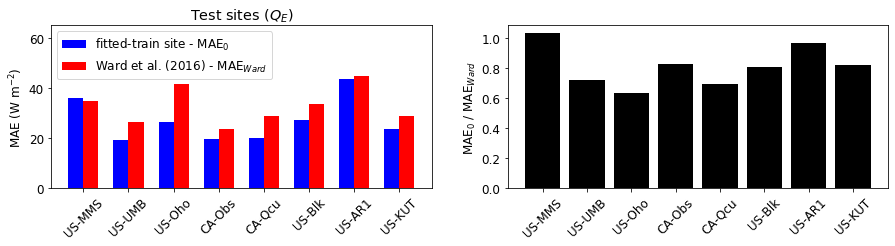

In [68]:
names=['US-MMS','US-UMB','US-Oho','CA-Obs','CA-Qcu','US-Blk','US-AR1','US-KUT']

plt.rcParams.update({'font.size': 12})
fig,axs=plt.subplots(1,2,figsize=(15,3))
ax=axs[1]
xx=np.arange(8)
ax.bar(xx,[x/y for x,y in zip(all_MAE,all_MAE_Helen)],color='k')
ax.set_xticks(xx)
ax.set_xticklabels([x for x in names],rotation=45)
ax.set_ylabel('MAE$_{0}$ / MAE$_{Ward}$')

ax=axs[0]
width=.5
xx=1.5*xx
ax.bar(xx-width/2,all_MAE,width=width,color='b',label='fitted-train site - MAE$_{0}$')
ax.bar(xx+width/2,all_MAE_Helen,width=width,color='r',label='Ward et al. (2016) - MAE$_{Ward}$')
ax.set_xticks(xx)
ax.set_title('Test sites ($Q_E$)')
ax.set_ylabel('MAE (W m$^{-2}$)')
ax.set_ylim([0,65])
ax.legend()
ax.set_xticklabels([x for x in names],rotation=45)
plt.savefig('MAE_vs_Helen.png',dpi=300,bbox_inches = 'tight',pad_inches = 0.01)

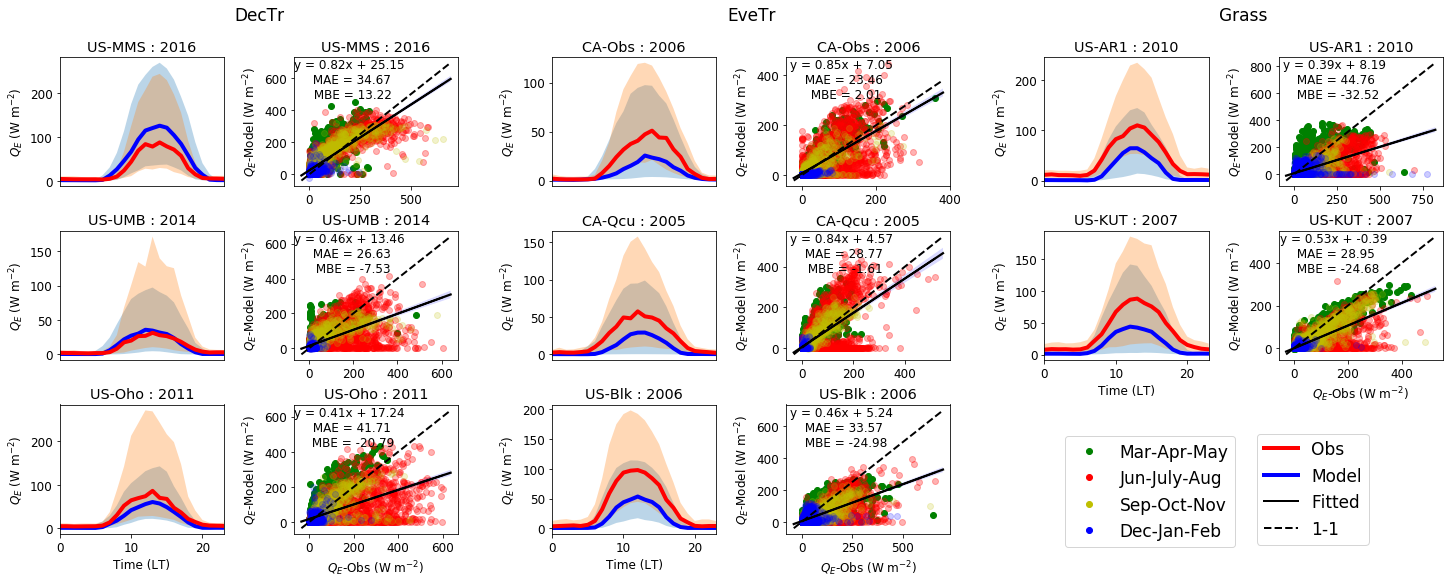

In [69]:
plt.rcParams.update({'font.size': 12})
fig,axs=plt.subplots(1,3,figsize=(25,9))
height=1.8
width="40%"
linewidth=2

ax=axs[0]
names=['US-MMS','US-UMB','US-Oho']
years={'US-MMS':[2016],
       'US-UMB':[2014],
       'US-Oho':[2011]
      }
fig_number={'US-MMS':[2,1],
       'US-UMB':[6,7],
       'US-Oho':[3,4]
      }

for name in names:
    

    for year in years[name]:
        i=fig_number[name][0]
        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)
        
        with open('surface_conductance/'+name+'-'+str(year)+'-Helen','rb') as f:
            out=pickle.load(f)
            
 
        IQR_compare('qe','QE',out['IQR']['obs'],out['IQR']['model'],box_1)
        box_1.set_title(name+' : '+str(year))
        

        if i not in [3]:
            box_1.set_xticks([])
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('Time (LT)')
            
        box_1.set_ylabel('$Q_E $ (W m$^{-2}$)')
            
        i=fig_number[name][1]        
        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)    
            
        obs_sim('qe','QE',out['obs_sim']['obs'],out['obs_sim']['model'],box_1,year)
        box_1.set_title(name+' : '+str(year))
        
        if i not in [4]:
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('$Q_E$-Obs (W m$^{-2}$)')

 

        box_1.set_ylabel('$Q_E$-Model (W m$^{-2}$)')
        
        

ax.axis('off')
ax.set_title('DecTr',y=1.05,fontsize=17)






names=['CA-Obs','CA-Qcu','US-Blk']
years={
       names[0]:[2006],
       names[1]:[2005],
       names[2]:[2006]
      }
fig_number={names[0]:[2,1],
            names[1]:[6,7],
            names[2]:[3,4]
      }

ax=axs[1]
for name in names:
    

    for year in years[name]:
        i=fig_number[name][0]
        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)
        
        with open('surface_conductance/'+name+'-'+str(year)+'-Helen','rb') as f:
            out=pickle.load(f)
            
 
        IQR_compare('qe','QE',out['IQR']['obs'],out['IQR']['model'],box_1)
        box_1.set_title(name+' : '+str(year))
        

        if i not in [3]:
            box_1.set_xticks([])
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('Time (LT)')
            
        box_1.set_ylabel('$Q_E $ (W m$^{-2}$)')
            
        i=fig_number[name][1]        
        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)    
            
        obs_sim('qe','QE',out['obs_sim']['obs'],out['obs_sim']['model'],box_1,year)
        box_1.set_title(name+' : '+str(year))
        
        if i not in [4]:
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('$Q_E$-Obs (W m$^{-2}$)')

 

        box_1.set_ylabel('$Q_E$-Model (W m$^{-2}$)')
        
        

ax.axis('off')
ax.set_title('EveTr',y=1.05,fontsize=17)






names=['US-AR1','US-KUT']
years={names[0]:[2010],
       names[1]:[2007]
      }
fig_number={names[0]:[2,1],
            names[1]:[6,7]
      }

ax=axs[2]

for name in names:
    

    for year in years[name]:
        i=fig_number[name][0]
        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)
        
        with open('surface_conductance/'+name+'-'+str(year)+'-Helen','rb') as f:
            out=pickle.load(f)
            
 
        IQR_compare('qe','QE',out['IQR']['obs'],out['IQR']['model'],box_1)
        box_1.set_title(name+' : '+str(year))
        

        if i not in [6]:
            box_1.set_xticks([])
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('Time (LT)')
            
        box_1.set_ylabel('$Q_E $ (W m$^{-2}$)')
            
        i=fig_number[name][1]        
        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)    
            
        obs_sim('qe','QE',out['obs_sim']['obs'],out['obs_sim']['model'],box_1,year)
        box_1.set_title(name+' : '+str(year))
        
        if i not in [7]:
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('$Q_E$-Obs (W m$^{-2}$)')

 

        box_1.set_ylabel('$Q_E$-Model (W m$^{-2}$)')
        
        
ax.axis('off')
ax.set_title('Grass',x=.5,y=1.05,fontsize=17)


plt.plot([],[],color='r',label='Obs',linewidth=4)
plt.plot([],[],color='b',label='Model',linewidth=4)
plt.plot([],[],'k',label='Fitted',linewidth=2)
plt.plot([],[],'k--',label='1-1',linewidth=2)
plt.legend(bbox_to_anchor=(.6, -.5),fontsize=17)


axs[2].plot([],[],'go',label='Mar-Apr-May')
axs[2].plot([],[],'ro',label='Jun-July-Aug')
axs[2].plot([],[],'yo',label='Sep-Oct-Nov')
axs[2].plot([],[],'bo',label='Dec-Jan-Feb')

axs[2].legend(bbox_to_anchor=(.5, .23),fontsize=17)


plt.savefig('gs_all_Helen.png',dpi=300,bbox_inches = 'tight',pad_inches = 0.01)